# **필요한 라이브러리 불러오기**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 사이킷런 라이브러리 더 추가해야하지 않나? https://ebbnflow.tistory.com/140

import missingno as msno

# warning 무시하기
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'missingno'

# **데이터 가져오기**

In [ ]:
import pandas as pd
train = pd.read_csv('../input/price-of-the-used-car/train-data_theusedcar.csv', sep=',')
test = pd.read_csv('../input/price-of-the-used-car/test-data_theusedcar.csv', sep=',')

# **데이터 탐색하기**

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
train.columns

In [ ]:
test.columns

* isnull().sum() 
          : feature 'new price'은 결측값이 너무 많다. (train: 5195/6019, test: 1052/1234)
          : feature 'Unnamed : 0'은 인덱스이므로 의미가 없다.
* columns 
          : 당연하지만 test set에는 price 속성(레이블)이 없다는 것을 확인할 수 있다.

# * **Feature engineering**

# **data dictionary**

* *Unnamed:0* -> delete unnecessary feature
* Name
* Location
* Year
* Kilometers_driven
* Fuel_type
* Transmission
* Owner_type
* Mileage
* Engine
* Power
* Seats
* *New_Price* -> delete unnecessary feature

In [ ]:
# run all 하면 오류 안 뜸 shift+enter을 하면 keyerror 오류 뜸 계속 속성이 축에 없대;;
# 필요없는 속성 지우기
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)


train.drop('New_Price', axis=1, inplace=True)
test.drop('New_Price', axis=1, inplace=True)

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
# Nan이 존재하는 행을 지울까 말까? 지우지 않고 평균값으로 대충 알아낼 수 있을까?
train.isnull().sum()

In [2]:
test.isnull().sum()

NameError: name 'test' is not defined

In [3]:
train.dropna(axis=0, inplace=True)

NameError: name 'train' is not defined

In [4]:
# test.info는 nan이 있는 행을 지울 필요가 있을까?
test.dropna(axis=0, inplace=True)

NameError: name 'test' is not defined

In [5]:
train.info() #6019 -> 5975

NameError: name 'train' is not defined

In [6]:
test.info() #1234 -> 1223

NameError: name 'test' is not defined

In [7]:
train.head()

NameError: name 'train' is not defined

# **name에서 brand만 추출하기**

In [8]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Brand'] = dataset['Name'].str.extract('([A-Za-z]+)\s', expand=False)

NameError: name 'train' is not defined

In [9]:
train['Brand'].value_counts()

NameError: name 'train' is not defined

# **Brand명 정리**

* **land -> land rover를 뜻하므로 값을 'Land Rover'로 바꾼다.**

* mini -> bmw의 mini cooper이고, bmw와 다른 브랜드로 취급한다.

* **force -> force one이라는 브랜드가 존재한다.** (정보가 별로 없어서 자세히 파악하기 힘들다.)

* smart -> smart라는 브랜드가 존재한다.

* **isuzu -> ISUZU와 Isuzu는 동일한 브랜드다.**

!! name과 같은 str타입은 소문자나 대문자로 통일하는 것이 좋겠다. but 다음에 시도하겠다.

* **ambassador -> hindustan ambassador라는 브랜드가 존재한다.**

In [10]:
#특정 값과 일치하는 데이터 필터링
# Land는 Land Rover를 뜻한다는 것을 확인할 수 있다.
is_Land = train['Brand'] == 'Land'
Land = train[is_Land]

Land

NameError: name 'train' is not defined

In [11]:
for dataset in train_test_data:
    dataset.loc[dataset['Brand'] == 'Land', 'Brand'] = 'Land Rover'

NameError: name 'train_test_data' is not defined

In [12]:
#특정 값과 일치하는 데이터 필터링
# Force는 Force one을 뜻한다는 것을 확인할 수 있다.
is_Force = train['Brand'] == 'Force'
Force = train[is_Force]

Force

NameError: name 'train' is not defined

In [13]:
for dataset in train_test_data:
    dataset.loc[dataset['Brand'] == 'Force', 'Brand'] = 'Force One'

NameError: name 'train_test_data' is not defined

In [14]:
is_Isuzu = train['Brand'] == 'Isuzu'
Isuzu = train[is_Isuzu]

Isuzu

NameError: name 'train' is not defined

In [15]:
is_ISUZU = train['Brand'] == 'ISUZU'
ISUZU = train[is_ISUZU]

ISUZU

NameError: name 'train' is not defined

In [16]:
# 왜 안 없어지지?
# Isuzu와 ISUZU는 동일한 브랜드이다.
for dataset in train_test_data:
    dataset.loc[dataset['Brand'] == 'ISUZU', 'Brand'] = 'Isuzu'
# ! Name과 같은 str타입은 소문자나 대문자로 통일하는 것이 좋겠다. but 다음에 시도하겠다.

NameError: name 'train_test_data' is not defined

In [17]:
is_Ambassador = train['Brand'] == 'Ambassador'
Ambassador = train[is_Ambassador]

Ambassador

NameError: name 'train' is not defined

In [18]:
for dataset in train_test_data:
    dataset.loc[dataset['Brand'] == 'Ambassador', 'Brand'] = 'Hindustan'

NameError: name 'train_test_data' is not defined

In [19]:
train['Brand'].value_counts()

NameError: name 'train' is not defined

In [20]:
# Name 속성을 없앤다.
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

NameError: name 'train' is not defined

Brand별로 class를 할당한다. 사분위수를 통해 클래스를 할당할 것이다.
이때, price 열 전체를 대상으로 하지 않는다. 극단적인 값이 있으므로 왜곡이 있을 수도 있다.
즉, 브랜드 별로 중앙값을 구한 후, 브랜드 별 중앙값을 대상으로 사분위수를 구할 것이다.

In [21]:
sns.set(style='ticks')

NameError: name 'train' is not defined

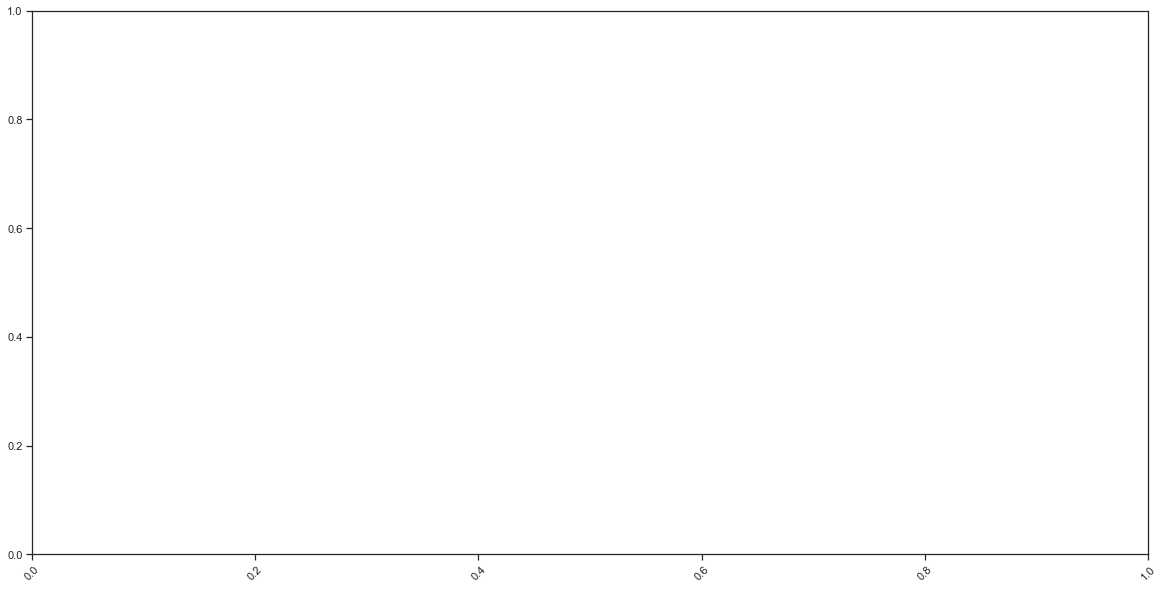

In [22]:
plt.figure(figsize=(20,10)) #크기 조절

plt.xticks(rotation=45) #font 기울기

sns.boxplot(x='Brand', y='Price', data=train)

In [ ]:
# 브랜드 별로 중앙값 구하기
# 극단적인 값이 상당 존재하므로 평균이 아닌 중앙값을 기준으로 한다.
median_of_brand = train.groupby('Brand')['Price'].agg(**{'median_price':'median'}).reset_index()
median_of_brand

In [23]:
# 브랜드 중앙값으로 통계치를 구했다.
median_of_brand['median_price'].describe()

NameError: name 'median_of_brand' is not defined

In [24]:
is_Q1 = median_of_brand['median_price'] < 4.3875
Q1 = median_of_brand[is_Q1]

Q1

NameError: name 'median_of_brand' is not defined

In [25]:
is_Q2 = (4.3875 <= median_of_brand['median_price'])&(median_of_brand['median_price'] < 7.785)
Q2 = median_of_brand[is_Q2]

Q2

NameError: name 'median_of_brand' is not defined

In [26]:
is_Q3 = (7.785 <= median_of_brand['median_price'])&(median_of_brand['median_price'] < 22.979)
Q3 = median_of_brand[is_Q3]

Q3

NameError: name 'median_of_brand' is not defined

In [27]:
is_Q4 = 22.979 <= median_of_brand['median_price']
Q4 = median_of_brand[is_Q4]

Q4

NameError: name 'median_of_brand' is not defined

In [28]:
train['Class'] = 0
train.loc[(train['Brand'] == 'Chevrolet')|(train['Brand'] == 'Datsun')|(train['Brand'] == 'Fiat')|(train['Brand'] == 'Hindustan')|(train['Brand'] == 'Maruti')|(train['Brand'] == 'Nissan')|(train['Brand'] == 'Smart')|(train['Brand'] == 'Tata'), 'Class'] = 0
train.loc[(train['Brand'] == 'Ford')|(train['Brand'] == 'Honda')|(train['Brand'] == 'Hyundai')|(train['Brand'] == 'Mahindra')|(train['Brand'] == 'Renault')|(train['Brand'] == 'Skoda')|(train['Brand'] == 'Volkswagen'), 'Class'] = 1
train.loc[(train['Brand'] == 'BMW')|(train['Brand'] == 'Force One')|(train['Brand'] == 'Isuzu')|(train['Brand'] == 'Jeep')|(train['Brand'] == 'Mitsubishi')|(train['Brand'] == 'Toyota')|(train['Brand'] == 'Volvo'), 'Class'] = 2
train.loc[(train['Brand'] == 'Audi')|(train['Brand'] == 'Bentley')|(train['Brand'] == 'Benz')|(train['Brand'] == 'Jaguar')|(train['Brand'] == 'Lamborghini')|(train['Brand'] == 'Land Rover')|(train['Brand'] == 'Mini')|(train['Brand'] == 'Porsche'), 'Class'] = 3

test['Class'] = 0
test.loc[(test['Brand'] == 'Chevrolet')|(test['Brand'] == 'Datsun')|(test['Brand'] == 'Fiat')|(test['Brand'] == 'Hindustan')|(test['Brand'] == 'Maruti')|(test['Brand'] == 'Nissan')|(test['Brand'] == 'Smart')|(test['Brand'] == 'Tata'), 'Class'] = 0
test.loc[(test['Brand'] == 'Ford')|(test['Brand'] == 'Honda')|(test['Brand'] == 'Hyundai')|(test['Brand'] == 'Mahindra')|(test['Brand'] == 'Renault')|(test['Brand'] == 'Skoda')|(test['Brand'] == 'Volkswagen'), 'Class'] = 1
test.loc[(test['Brand'] == 'BMW')|(test['Brand'] == 'Force One')|(test['Brand'] == 'Isuzu')|(test['Brand'] == 'Jeep')|(test['Brand'] == 'Mitsubishi')|(test['Brand'] == 'Toyota')|(test['Brand'] == 'Volvo'), 'Class'] = 2
test.loc[(test['Brand'] == 'Audi')|(test['Brand'] == 'Bentley')|(test['Brand'] == 'Benz')|(test['Brand'] == 'Jaguar')|(test['Brand'] == 'Lamborghini')|(test['Brand'] == 'Land Rover')|(test['Brand'] == 'Mini')|(test['Brand'] == 'Porsche'), 'Class'] = 3

NameError: name 'train' is not defined

In [29]:
train['Class'].value_counts()

NameError: name 'train' is not defined

Brand를 수치화했다. -> Class 속성으로 표현했다.

# Brand 외 다른 속성들도 float type 아닌 것은 float type으로 바꿔준다.

* 단위를 없앤다.

In [30]:
#이상하게 null이 나온다. 잘 실행된 것 : float type
#for dataset in train_test_data:
#    dataset['Power'] = dataset['Power'].str.extract('(\d+)')

In [31]:
for dataset in train_test_data:
    dataset['Engine'] = dataset['Engine'].str.extract('(\d+)')

NameError: name 'train_test_data' is not defined

In [32]:
# 단위가 각각 다름을 주의 -> 시간 관계상 단위가 통일 됐다고 가정하고 넘어가겠다.
for dataset in train_test_data:
    dataset['Mileage'] = dataset['Mileage'].str.extract('(\d+)')

NameError: name 'train_test_data' is not defined

* float로 통일시킨다. 단위를 없애서 수치만 남겨놓는다.

In [33]:
# float로 통일시킨다.
train["Year"] = train["Year"].astype(float)
train["Kilometers_Driven"] = train["Kilometers_Driven"].astype(float)
train["Class"] = train["Class"].astype(float)
train["Engine"] = train["Engine"].astype(float)
train["Mileage"] = train["Mileage"].astype(float)

test["Year"] = test["Year"].astype(float)
test["Kilometers_Driven"] = test["Kilometers_Driven"].astype(float)
test["Class"] = test["Class"].astype(float)
test["Engine"] = test["Engine"].astype(float)
test["Mileage"] = test["Mileage"].astype(float)

NameError: name 'train' is not defined

In [34]:
#float형으로 바꿔야할 것이 더 남았지만 시간 관계상 넘어가고 float형으로 바꾼 속성값만으로 model을 학습시키겠다.
train.info()

NameError: name 'train' is not defined

# **선형회귀_Model 학습하기**

* 학습데이터 준비
        현재 float type인 속성들만 가지고 한다. 시간 관계상 다 못함.

In [35]:
x_train = train.loc[:, ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Class']]
t_train = train['Price']

NameError: name 'train' is not defined

* 밑의 drop한 속성들은 원래 수치화를 해야한 것이었다.
Location, Fuel_Type, Transmission, Owner_Type, Power, Seats

* Brand 속성은 수치화했다. Class 속성에서 볼 수 있다.

In [36]:
x_train.info()

NameError: name 'x_train' is not defined

* 다변인 선형회귀 모델

* 행렬로 정의 y = Wx + b 꼴로

* dataframe -> numpy 로 변환

In [37]:
x_data = x_train.values
t_data = t_train.values

NameError: name 'x_train' is not defined

In [38]:
W = np.random.rand(5,1) # 4*1 matrics
b = np.random.rand(1)
print("W = ", W, ', W.shape = ', W.shape, ', b = ', b, ', b.shape = ', b.shape)

W =  [[0.69465905]
 [0.67813309]
 [0.02075813]
 [0.97748103]
 [0.66906329]] , W.shape =  (5, 1) , b =  [0.3067421] , b.shape =  (1,)


* 최소제곱법 -> 손실함수 E(W,b) 정의

In [39]:
def loss_func(x, t):
    # Y = X*W + b
    y = np.dot(x, W) + b
    
    # 최소제곱합
    return np.sum((t - y) ** 2) / len(x)

In [40]:
# 미분함수
def numerical_derivative(fx, input_list):
    delta_x = 1e-6

    ret = np.zeros_like(input_list)
    it = np.nditer(input_list, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        i = it.multi_index

        tmp = input_list[i]
        input_list[i] = float(tmp) - delta_x
        f1 = fx(input_list)

        input_list[i] = float(tmp) + delta_x
        f2 = fx(input_list)
        ret[i] = (f2 - f1) / (delta_x * 2)

        input_list[i] = tmp
        it.iternext()

    return ret

In [41]:
# cost 함수
def error_val(x, t):
    y = np.dot(x, W) + b
    return np.sum((t - y) ** 2) / len(x)

In [42]:
# 학습 후 미래 값 예측 input: x
def predict(x):
    y = np.dot(x, W) + b
    return y

In [43]:
# 학습 가중치 초기화
learning_rate = 0.0000005

f = lambda x: loss_func(x_data, t_data)
print("Initial error value = ", error_val(x_data, t_data), "initial W = ", W, "initial b = ", b)

for step in range(8001):
    # 학습
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)

    if step % 400 == 0:
        print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, "b = ", b)

NameError: name 'x_data' is not defined

In [44]:
x_test = test.loc[:, ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Class']]
t_test = test['Price']

NameError: name 'test' is not defined

In [45]:
x_predict = x_test.values
t_predict = t_test.values

NameError: name 'x_test' is not defined

In [46]:
print(predict([100, 98, 81]))

ValueError: shapes (3,) and (5,1) not aligned: 3 (dim 0) != 5 (dim 0)

In [47]:
print(predict(x_predict[1]))

NameError: name 'x_predict' is not defined

학습률 0.000005 설정 -> 짧은 식 내에서 정확한 결과가 나오도록 구현 가능